In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
wine = pd.read_csv('/Users/rithikak/Downloads/winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

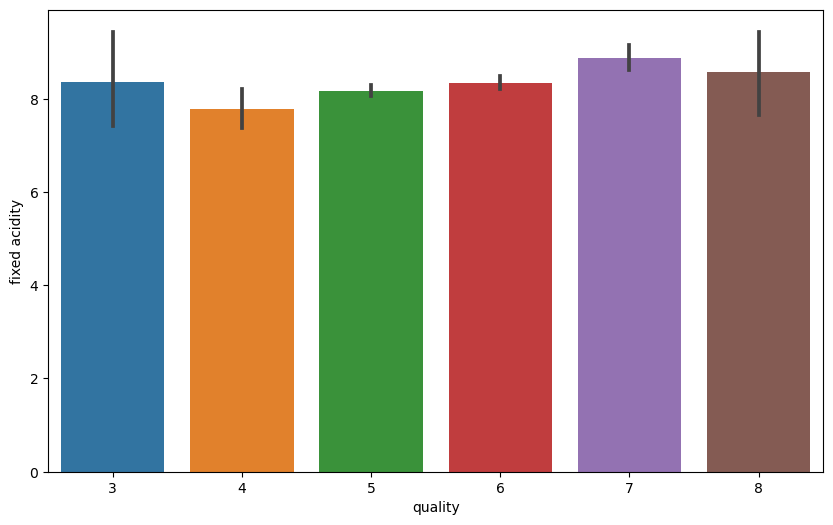

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

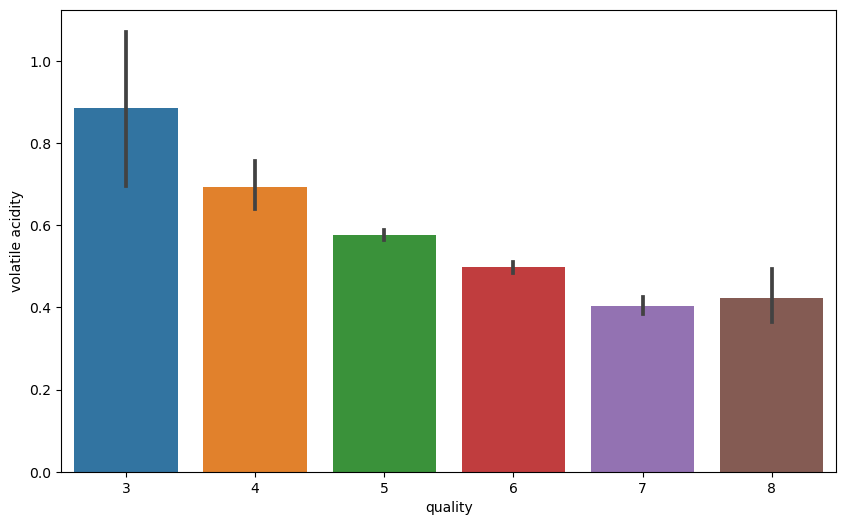

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

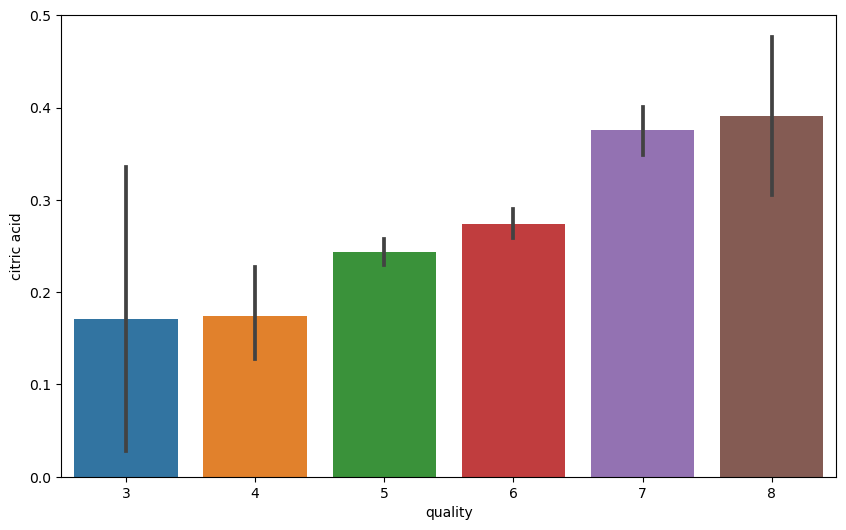

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

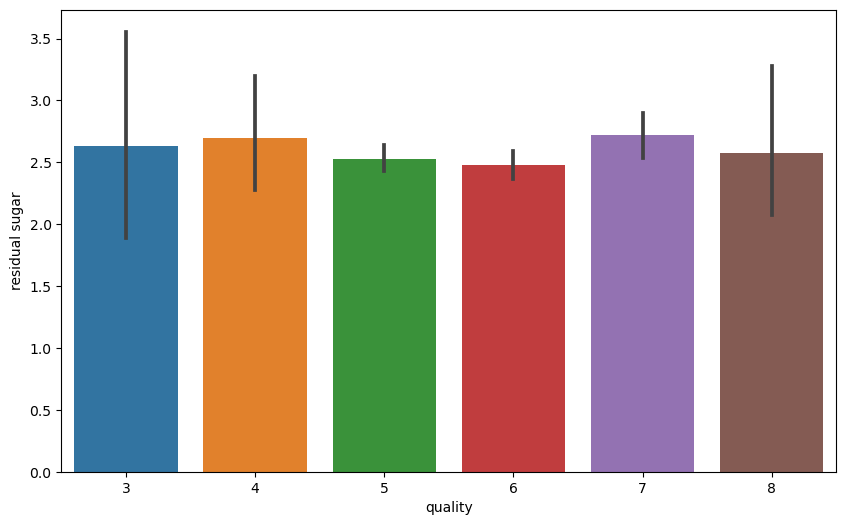

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='chlorides'>

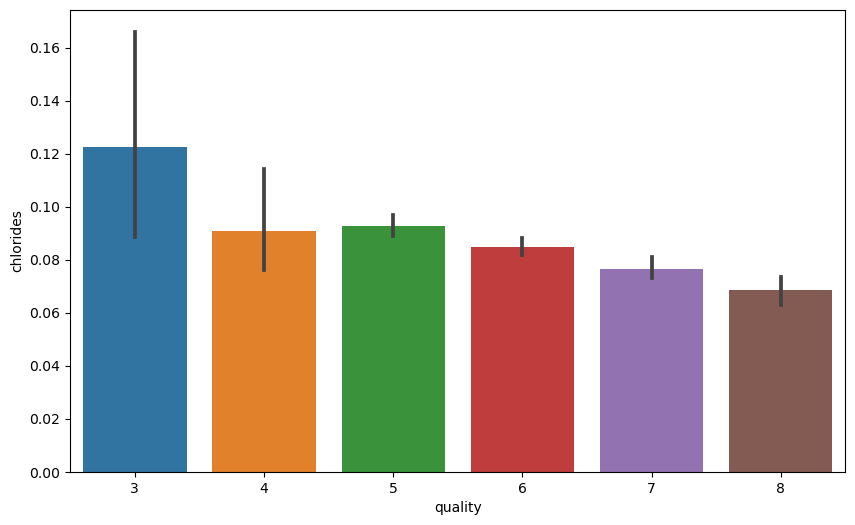

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

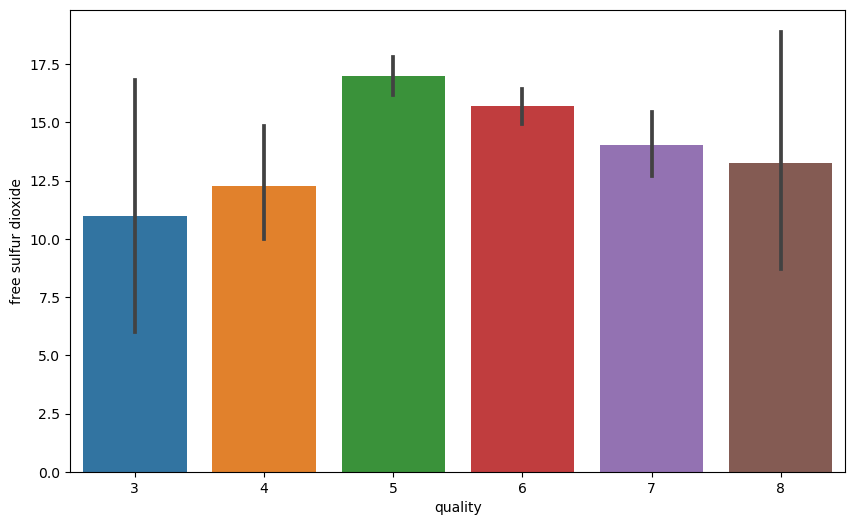

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

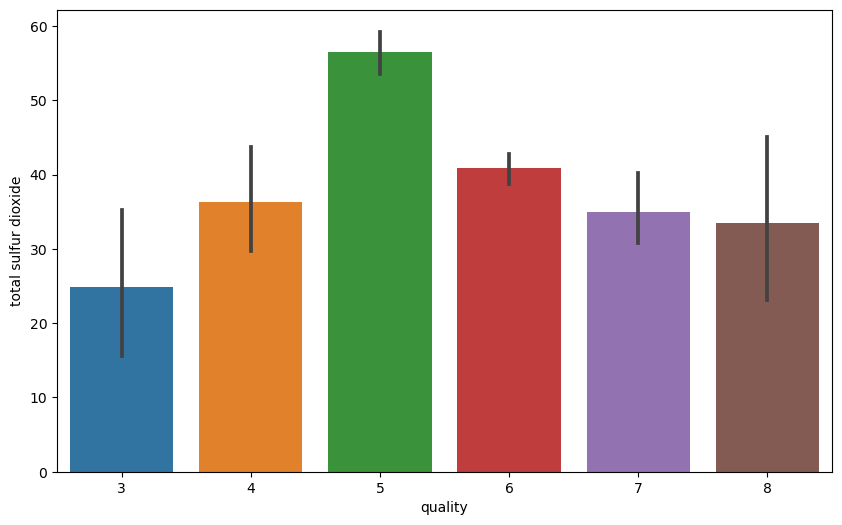

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

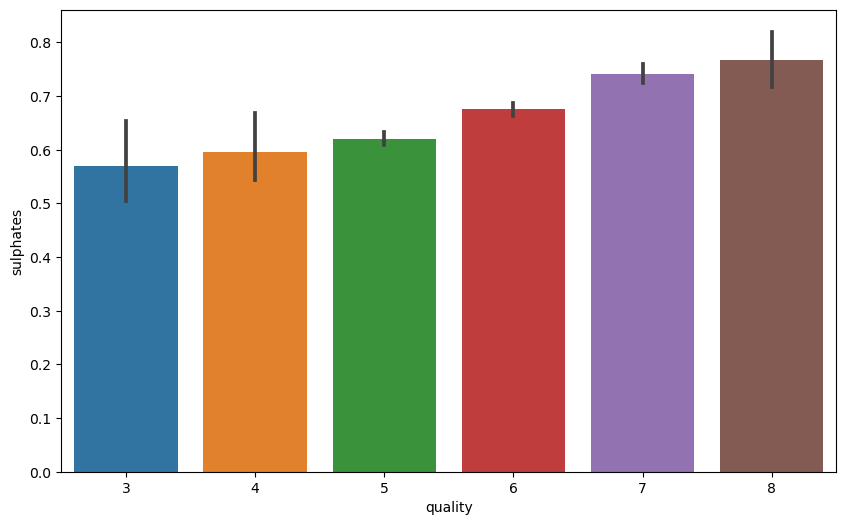

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

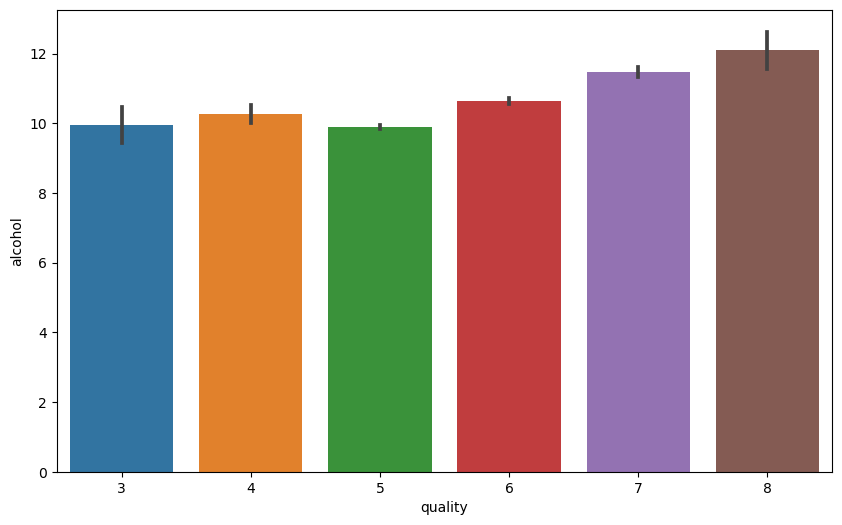

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [15]:
bins = (2, 6, 8)
labels = ['bad', 'good']
wine['quality'] = pd.cut(x = wine['quality'], bins = bins, labels = labels)

In [16]:
wine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [17]:
label_quality = LabelEncoder()

In [21]:
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

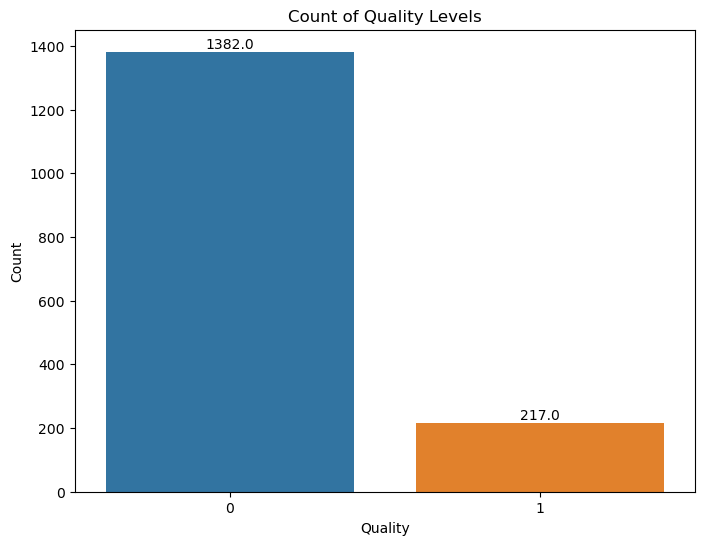

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=wine, x='quality')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Quality Levels')
plt.show()

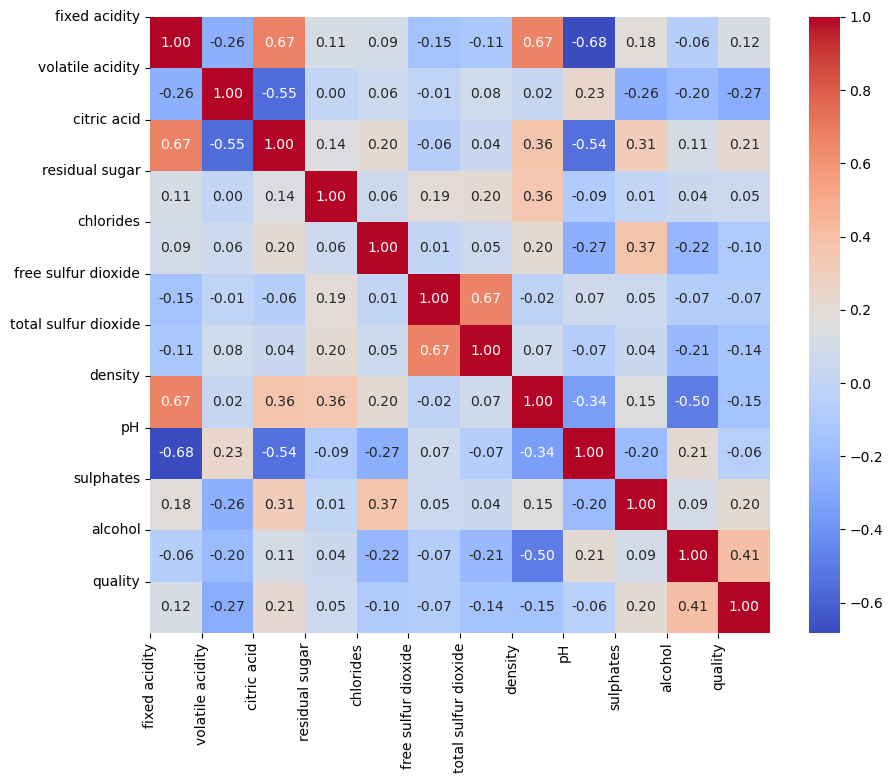

In [29]:
corr = wine.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [32]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279,)
Shape of y_test (320,)


# Random Forest Classifier

In [81]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Random Forest Classifier:


In [82]:
print("Random Forest Classifier:")
print(classification_report(y_test, pred_rfc))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.68      0.36      0.47        47

    accuracy                           0.88       320
   macro avg       0.79      0.67      0.70       320
weighted avg       0.87      0.88      0.87       320



In [42]:
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 25  22]]


In [97]:
report = classification_report(y_test, pred_rfc)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, pred_rfc)
accuracy_rf = (precision[1] * support[1] + precision[0] * support[0]) / sum(support)

In [52]:
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

In [53]:
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)
y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.9140194389763779
Training set:  1.0
Test set:  0.8875


In [54]:
confusion_matrix(y_test, y_pred_rf_test)

array([[266,   7],
       [ 29,  18]])

In [55]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

# Logistic Regression

In [80]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [61]:
confusion_matrix(y_test, y_pred)

array([[268,   5],
       [ 35,  12]])

In [98]:
report = classification_report(y_test, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
accuracy_lr = (precision[1] * support[1] + precision[0] * support[0]) / sum(support)

In [44]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [49]:
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())
y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)
y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.885857529527559
Training set:  0.8858483189992181
Test set:  0.875


In [50]:
confusion_matrix(y_test, y_pred_lr_test)

array([[268,   5],
       [ 35,  12]])

In [56]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

# Support Vector Classifier

In [68]:
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
linear_svc_pred = linear_svc.predict(X_test)
print("Linear SVM:")
print(classification_report(y_test, linear_svc_pred))

Linear SVM:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



/Users/rithikak/Desktop/Programming/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rithikak/Desktop/Programming/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rithikak/Desktop/Programming/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [69]:
print(confusion_matrix(y_test, linear_svc_pred))

[[273   0]
 [ 47   0]]


In [99]:
report = classification_report(y_test, linear_svc_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, linear_svc_pred)
accuracy_lsvm = (precision[1] * support[1] + precision[0] * support[0]) / sum(support)

/Users/rithikak/Desktop/Programming/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rithikak/Desktop/Programming/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rithikak/Desktop/Programming/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [70]:
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(X_train, y_train.ravel())
cv_svm_linear = cross_val_score(estimator = classifier_svm_linear, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_linear.mean())
y_pred_svm_linear_train = classifier_svm_linear.predict(X_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)
y_pred_svm_linear_test = classifier_svm_linear.predict(X_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

CV:  0.8670829232283465
Training set:  0.8670836591086787
Test set:  0.853125


In [71]:
confusion_matrix(y_test, y_pred_svm_linear_test)

array([[273,   0],
       [ 47,   0]])

In [72]:
tp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,0]
fp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,1]
tn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,1]
fn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,0]

In [73]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
rbf_svc_pred = rbf_svc.predict(X_test)
print("Kernel SVM (RBF):")
print(classification_report(y_test, rbf_svc_pred))

Kernel SVM (RBF):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [74]:
confusion_matrix(y_test, rbf_svc_pred)

array([[268,   5],
       [ 35,  12]])

In [100]:
report = classification_report(y_test, rbf_svc_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, rbf_svc_pred)
accuracy_ksvm = (precision[1] * support[1] + precision[0] * support[0]) / sum(support)

In [76]:
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001, gamma = 'scale')
classifier_svm_kernel.fit(X_train, y_train.ravel())
cv_svm_kernel = cross_val_score(estimator = classifier_svm_kernel, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_kernel.mean())
y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)
y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

CV:  0.8999261811023622
Training set:  0.9421422986708365
Test set:  0.890625


In [77]:
confusion_matrix(y_test, y_pred_svm_kernel_test)

array([[262,  11],
       [ 24,  23]])

In [87]:
tp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,0]
fp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,1]
tn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,1]
fn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,0]

# Naive Bayes

In [79]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes:")
print(classification_report(y_test, nb_pred))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

    accuracy                           0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320



In [83]:
confusion_matrix(y_test, nb_pred)

array([[238,  35],
       [ 12,  35]])

In [101]:
report = classification_report(y_test, nb_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, nb_pred)
accuracy_nb = (precision[1] * support[1] + precision[0] * support[0]) / sum(support)

In [84]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_nb.mean())
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)
y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.8373462106299213
Training set:  0.8389366692728695
Test set:  0.853125


In [85]:
confusion_matrix(y_test, y_pred_nb_test)

array([[238,  35],
       [ 12,  35]])

In [86]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

# Decision Tree Classifier

In [89]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, dt_pred))

Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       273
           1       0.48      0.47      0.47        47

    accuracy                           0.85       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.85      0.85      0.85       320



In [90]:
confusion_matrix(y_test, dt_pred)

array([[249,  24],
       [ 25,  22]])

In [102]:
report = classification_report(y_test, dt_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, dt_pred)
accuracy_dt = (precision[1] * support[1] + precision[0] * support[0]) / sum(support)

In [91]:
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train, y_train.ravel())
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)
y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.8920952263779528
Training set:  1.0
Test set:  0.853125


In [92]:
confusion_matrix(y_test, y_pred_dt_test)

array([[253,  20],
       [ 27,  20]])

In [93]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

In [104]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean(),accuracy_lr),
          ('SVM (Linear)', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, accuracy_svm_linear_train, accuracy_svm_linear_test, cv_svm_linear.mean(),accuracy_lsvm),
          ('SVM (Kernel)', tp_svm_kernel, fp_svm_kernel, tn_svm_kernel, fn_svm_kernel, accuracy_svm_kernel_train, accuracy_svm_kernel_test, cv_svm_kernel.mean(),accuracy_ksvm),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean(),accuracy_nb),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean(),accuracy_dt),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean(),accuracy_rf)
         ]

In [105]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation','Accuracy of model without CV'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation,Accuracy of model without CV
0,Logistic Regression,268,5,12,35,0.885848,0.875000,0.885858,0.858256
1,SVM (Linear),273,0,0,47,0.867084,0.853125,0.867083,0.727822
2,SVM (Kernel),262,11,23,24,0.942142,0.890625,0.899926,0.858256
3,Naive Bayes,238,35,35,12,0.838937,0.853125,0.837346,0.885613
4,Decision Tree Classification,253,20,20,27,1.000000,0.853125,0.892095,0.845530
5,Random Forest Tree Classification,266,7,18,29,1.000000,0.887500,0.914019,0.866242


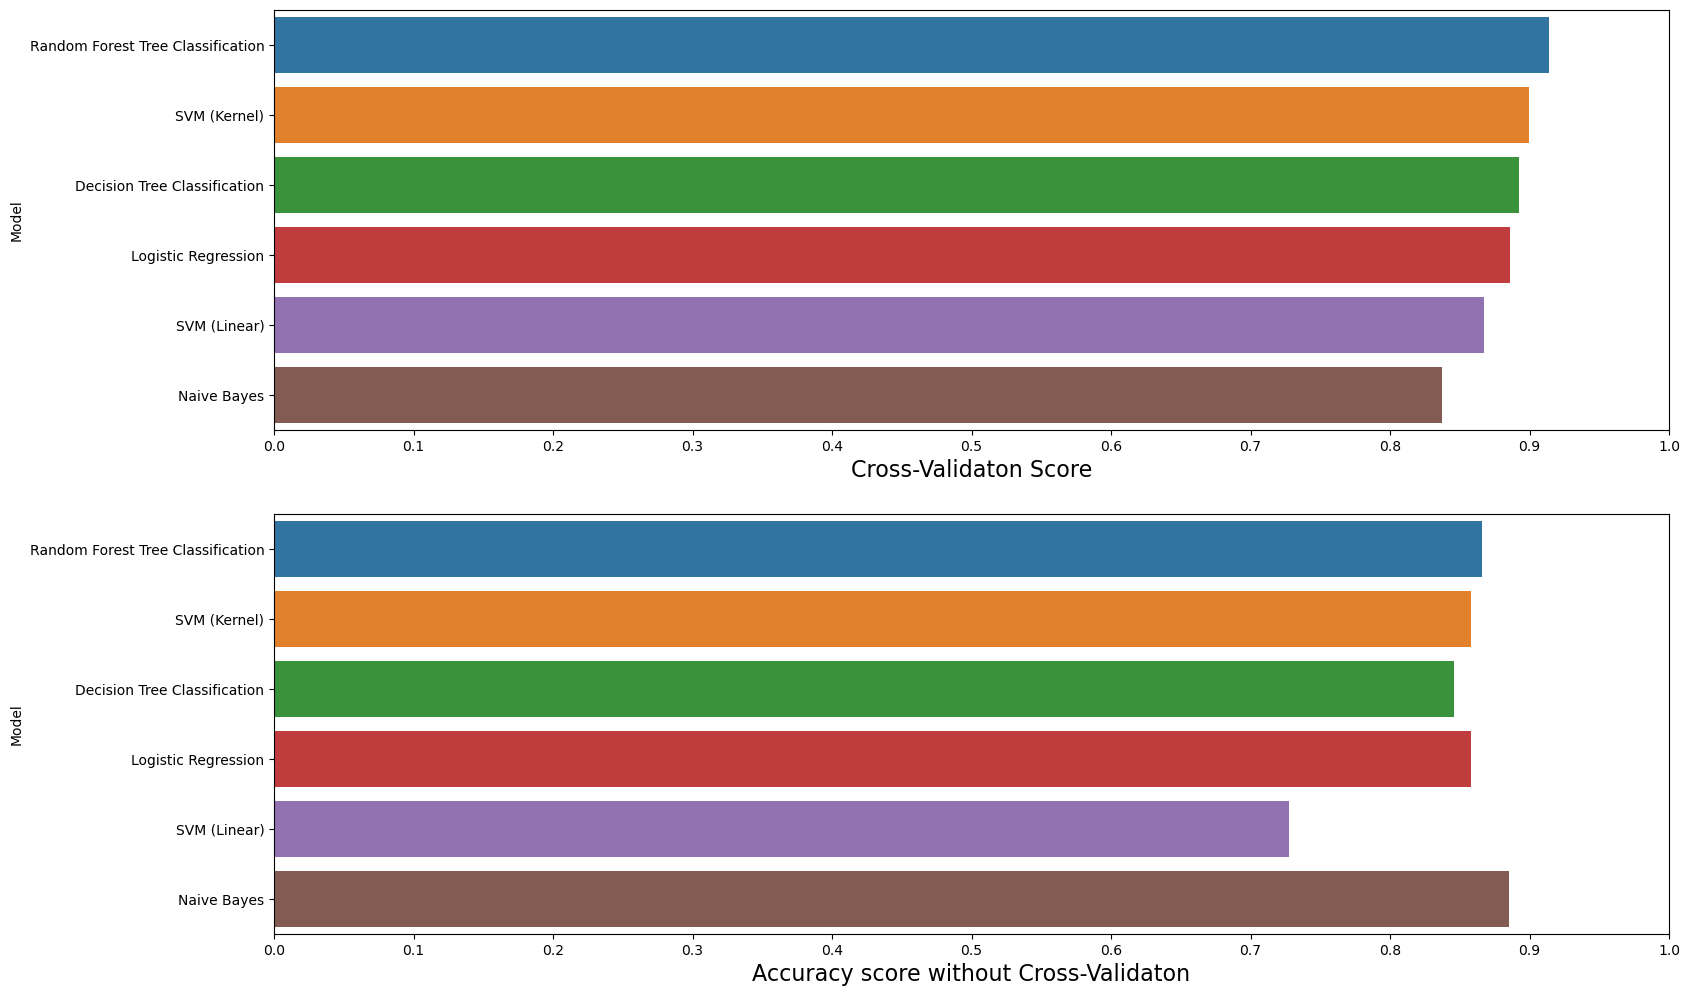

In [113]:
f, axe = plt.subplots(2,1, figsize=(18,12))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)
sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe[0])
axe[0].set_xlabel('Cross-Validaton Score', size=16)
axe[0].set_ylabel('Model')
axe[0].set_xlim(0,1.0)
axe[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)
sns.barplot(x='Accuracy of model without CV', y='Model', data = predict, ax = axe[1])
axe[1].set_xlabel('Accuracy score without Cross-Validaton', size=16)
axe[1].set_ylabel('Model')
axe[1].set_xlim(0,1.0)
axe[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()
plt.show()

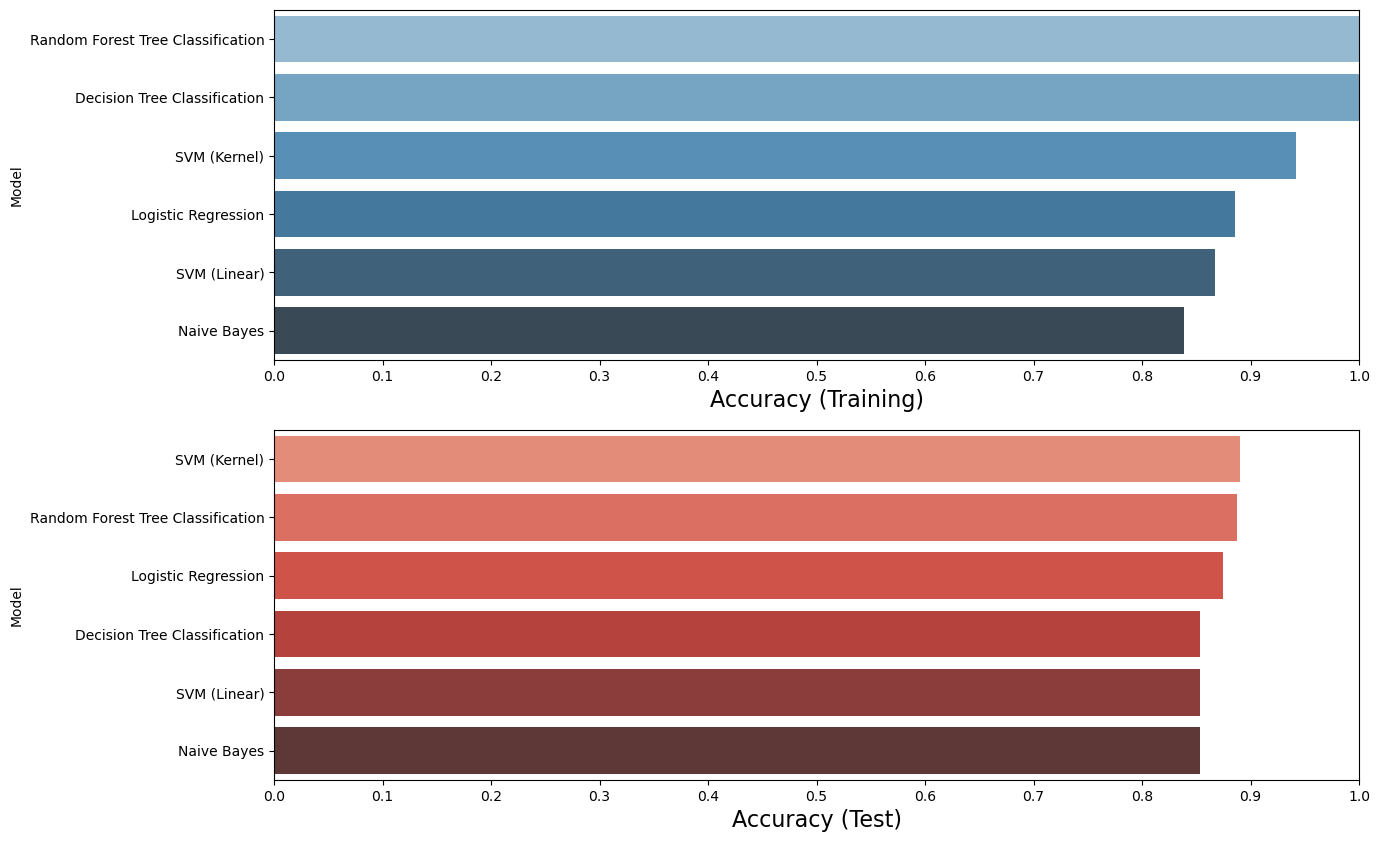

In [110]:
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)
sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)
sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

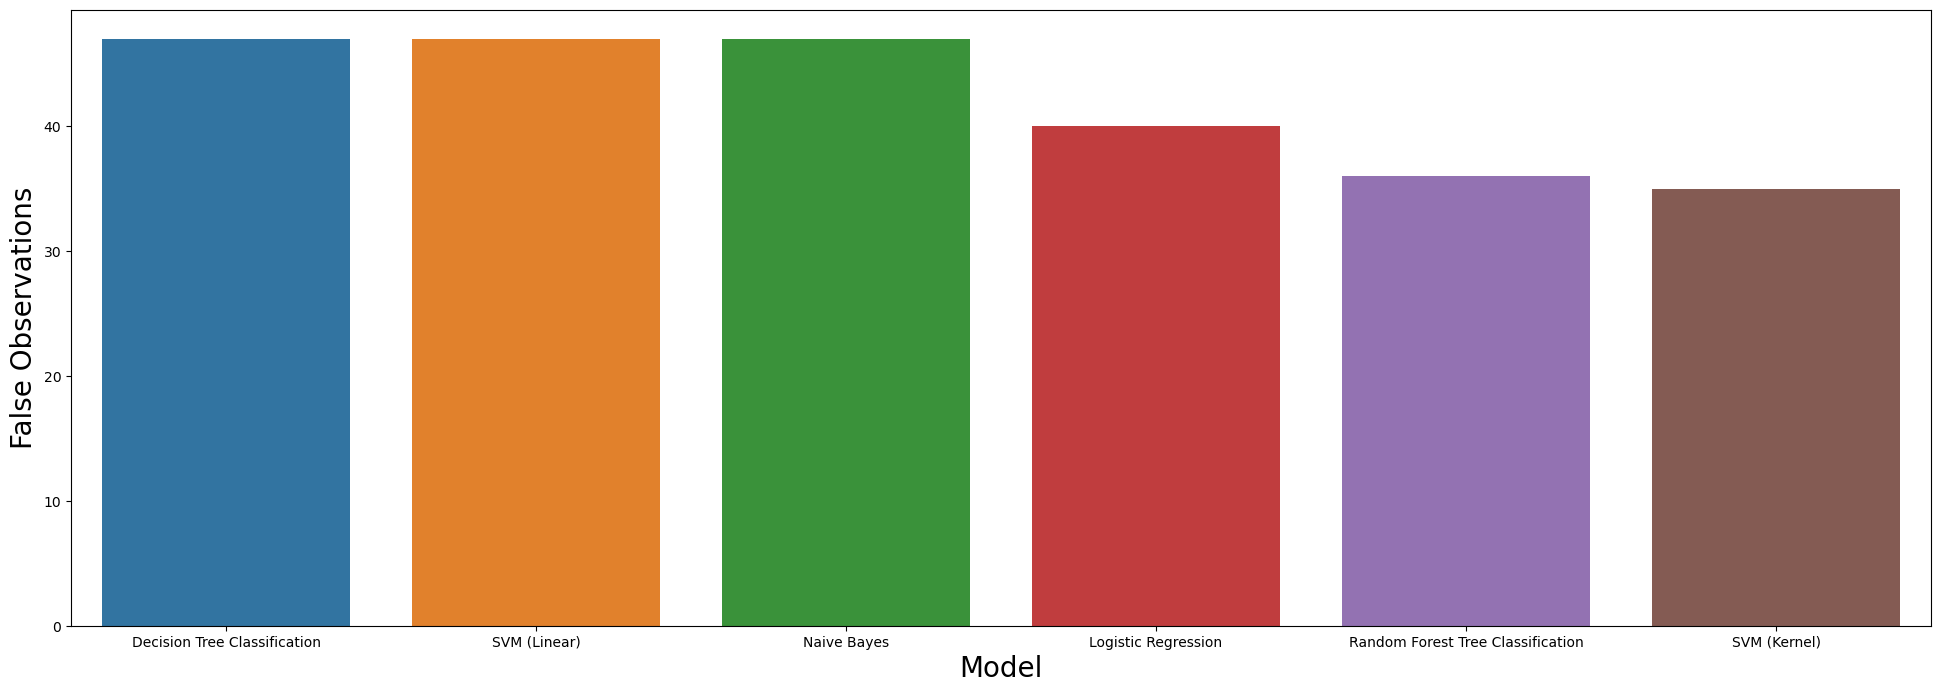

In [114]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)
f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)
plt.show()

# Conclusion

In this kernel, I have built 6 classification models using Red Wine Quality Dataset. These are logistic, svm(linear), svm(kernel), naive bayes, decision tree and random forest classification. Then measured and visualized the performance of the models.